In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
df = pd.read_csv("kion10y.csv", encoding="utf-8")

In [3]:
# separate data into training part and testing part
train_year = df["year"] <= 2022 # years before 2023 are used for training
test_year = df["year"] > 2022 # 2023 is used for testing
interval = 6

In [12]:
# use past 6 days as training data
def make_data(data):
    x = [] # for training
    y = [] # for testing
    temps = list(data["temp"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

解析：x为list且y为list of list，其中x为一个包含所有大于5 index的list（去除0，1，2，3，4，5）；y为一个由每个x所对应的前6位的list而组成的list。

In [13]:
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [16]:
# conduct linear regression
lr = LinearRegression() # in new version, parameter "normalize" has been removed
lr.fit(train_x, train_y)
pre_y = lr.predict(test_x)

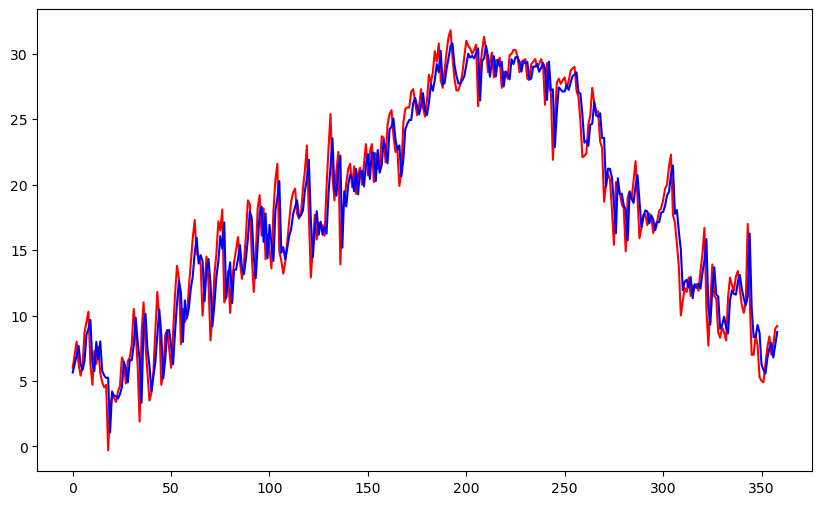

In [17]:
# use plot to show the results
plt.figure(figsize=(10,6), dpi=100)
plt.plot(test_y, c="r") # r=red
plt.plot(pre_y, c="b") # b=blue
plt.savefig("predict.lr.png")
plt.show()

In [18]:
# assesing
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y)) # average error
print("max=", max(diff_y)) # maximum error

average= 1.5093570047219733
max= 8.320497553029911
